# Importing libraries :  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split , KFold ,cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB

# Loading datastet :

In [2]:
data = pd.read_csv(r'E:\machine learning (IMT)\machine learning\data_set\Bank_Personal_Loan_Modelling(1).csv')

In [3]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


# Features explanations :

* CCAvg --> Avg spending on credit card per month 




* Mortgage --> value of house mortgage 




* Securities Account --> Does customer have a security acount with bank ? 




* Education :
1--> undergrad
2--> grad
3---> pro




* CD Account --> does customer have certifiacte of deposit with bank ? 





* Online ---> Does customer use internet bank facilities ? 





* CreditCard --> Does customer use credit card issuued by Universalbank ?






# Information about data and columns :

data.info()

* No missing value 
* CCAvg is object ---> need to be change to numerical 

In [4]:
data['CCAvg'] = data['CCAvg'].str.replace('/' , '.').astype(float)

In [5]:
print(data.head(3))

print(data.info())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   in

* The data structure of CCAvg has been changed from obj --> float

# Data distribution :

In [6]:
features = pd.DataFrame(data , columns =['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])

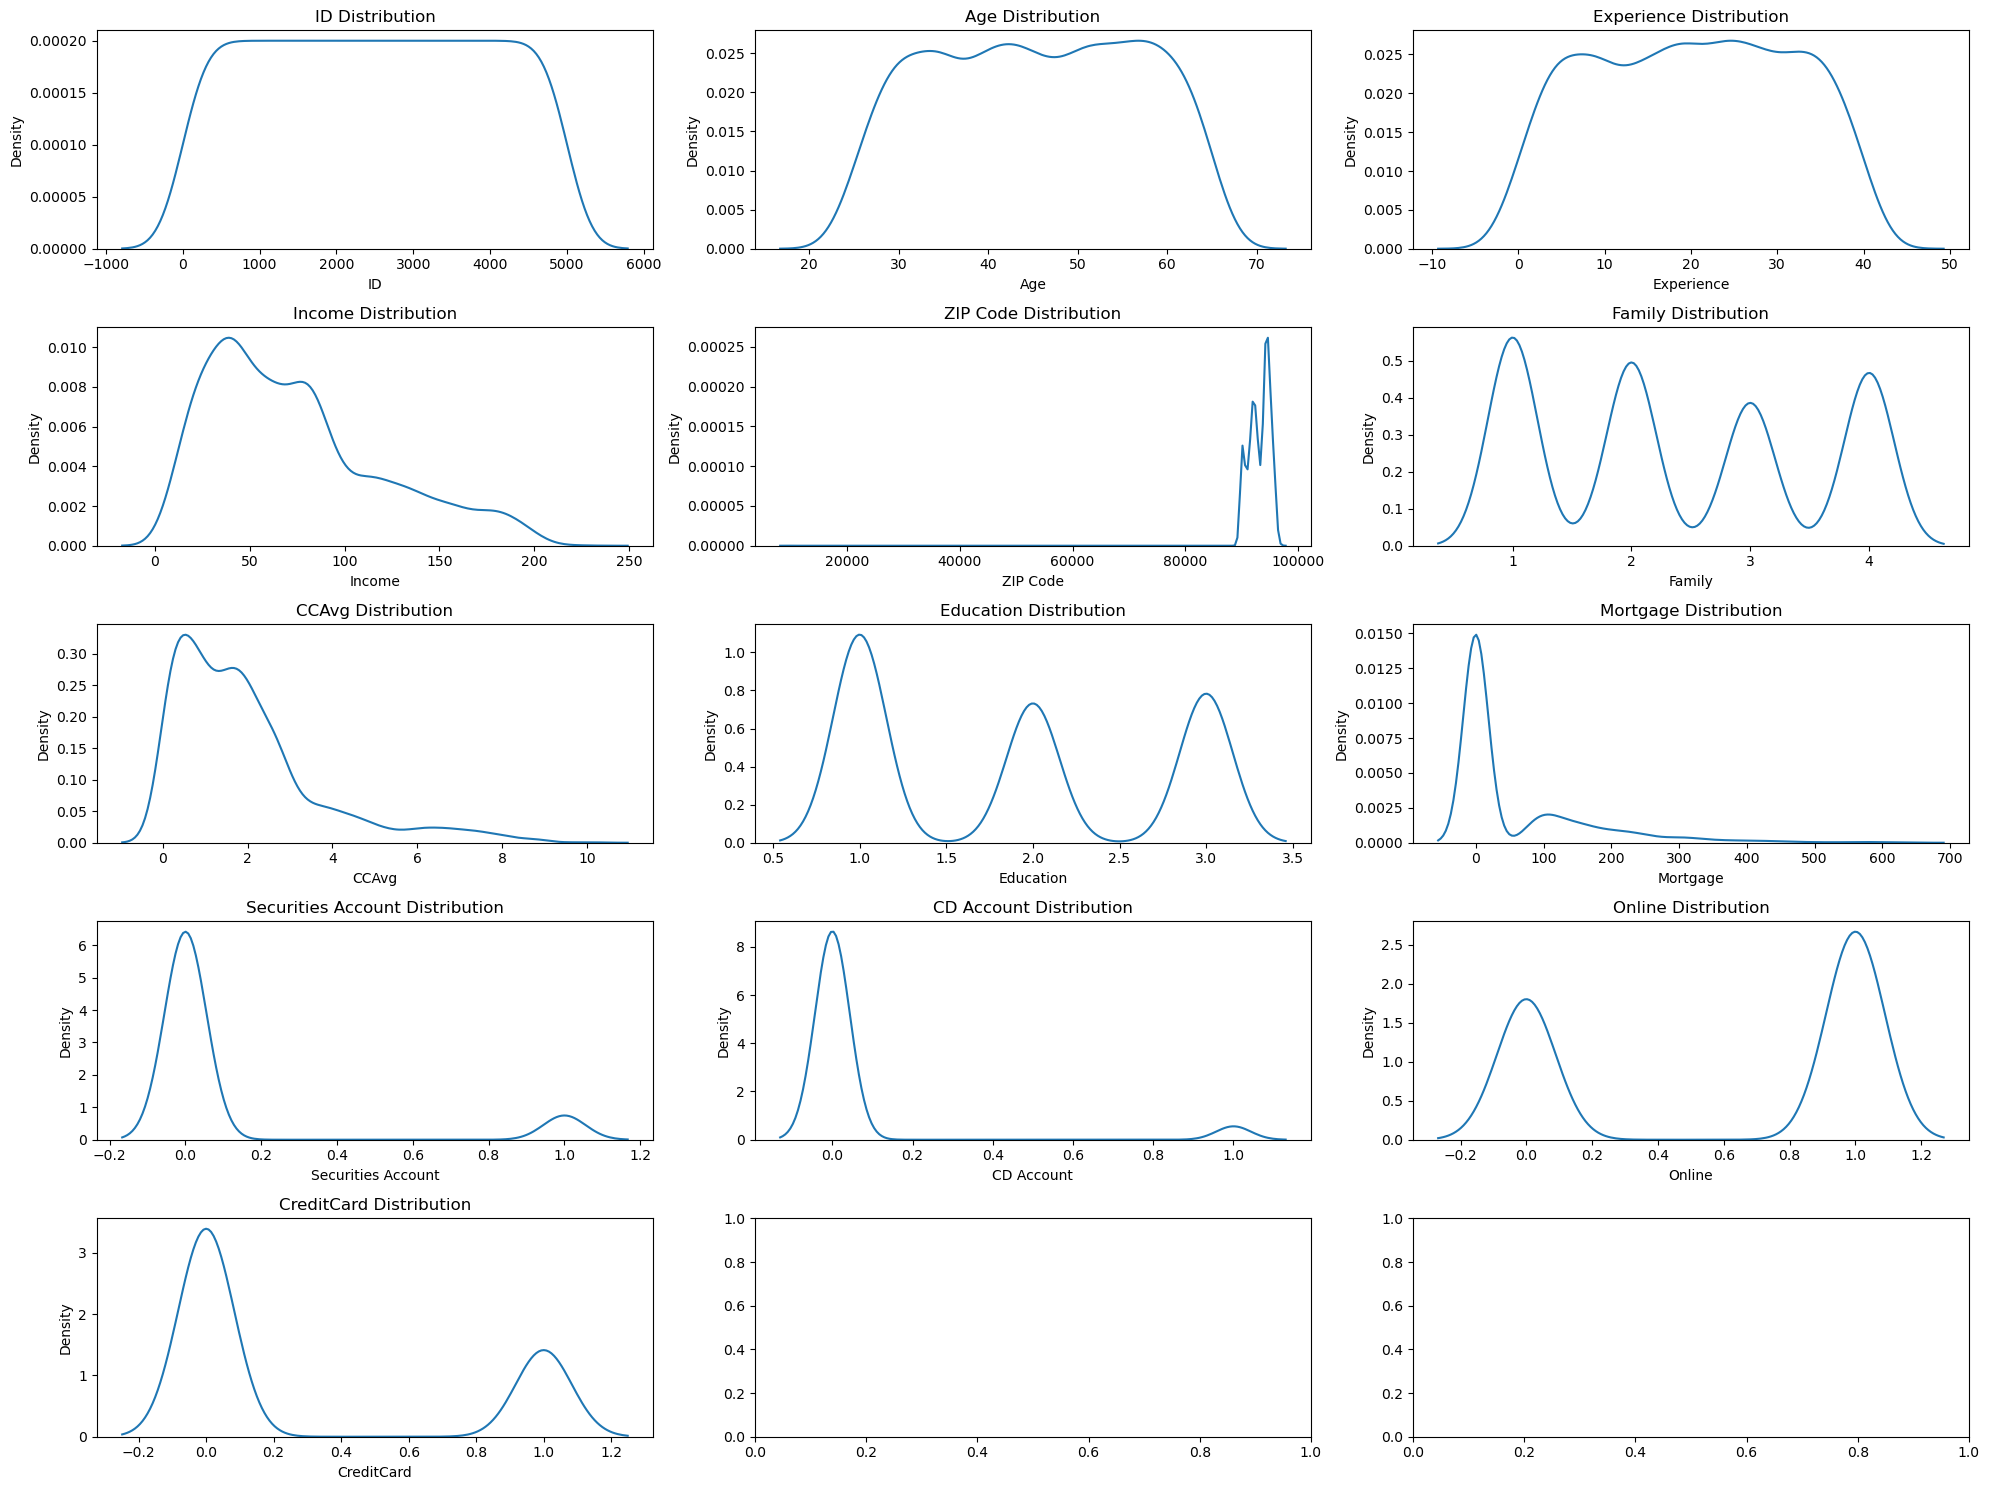

In [7]:
fig , ax = plt.subplots(nrows=5 , ncols=3 , figsize =(20,15))

ax = ax.flatten()
# turn to one dimentional array make it easier for drawing ploto
for i , col in enumerate(features.columns):
    sns.kdeplot(features[col] , ax=ax[i])
    ax[i].set_title(f'{col} Distribution')
    
plt.tight_layout()
# this function will prevent text overlap each others 
plt.show()

* family and education  distribution are categorized 
* Onlinr , Securities Account , CreditCard are binary 
* Age - Experience , CCAvg , zip code , motgage have Guassian distribution 

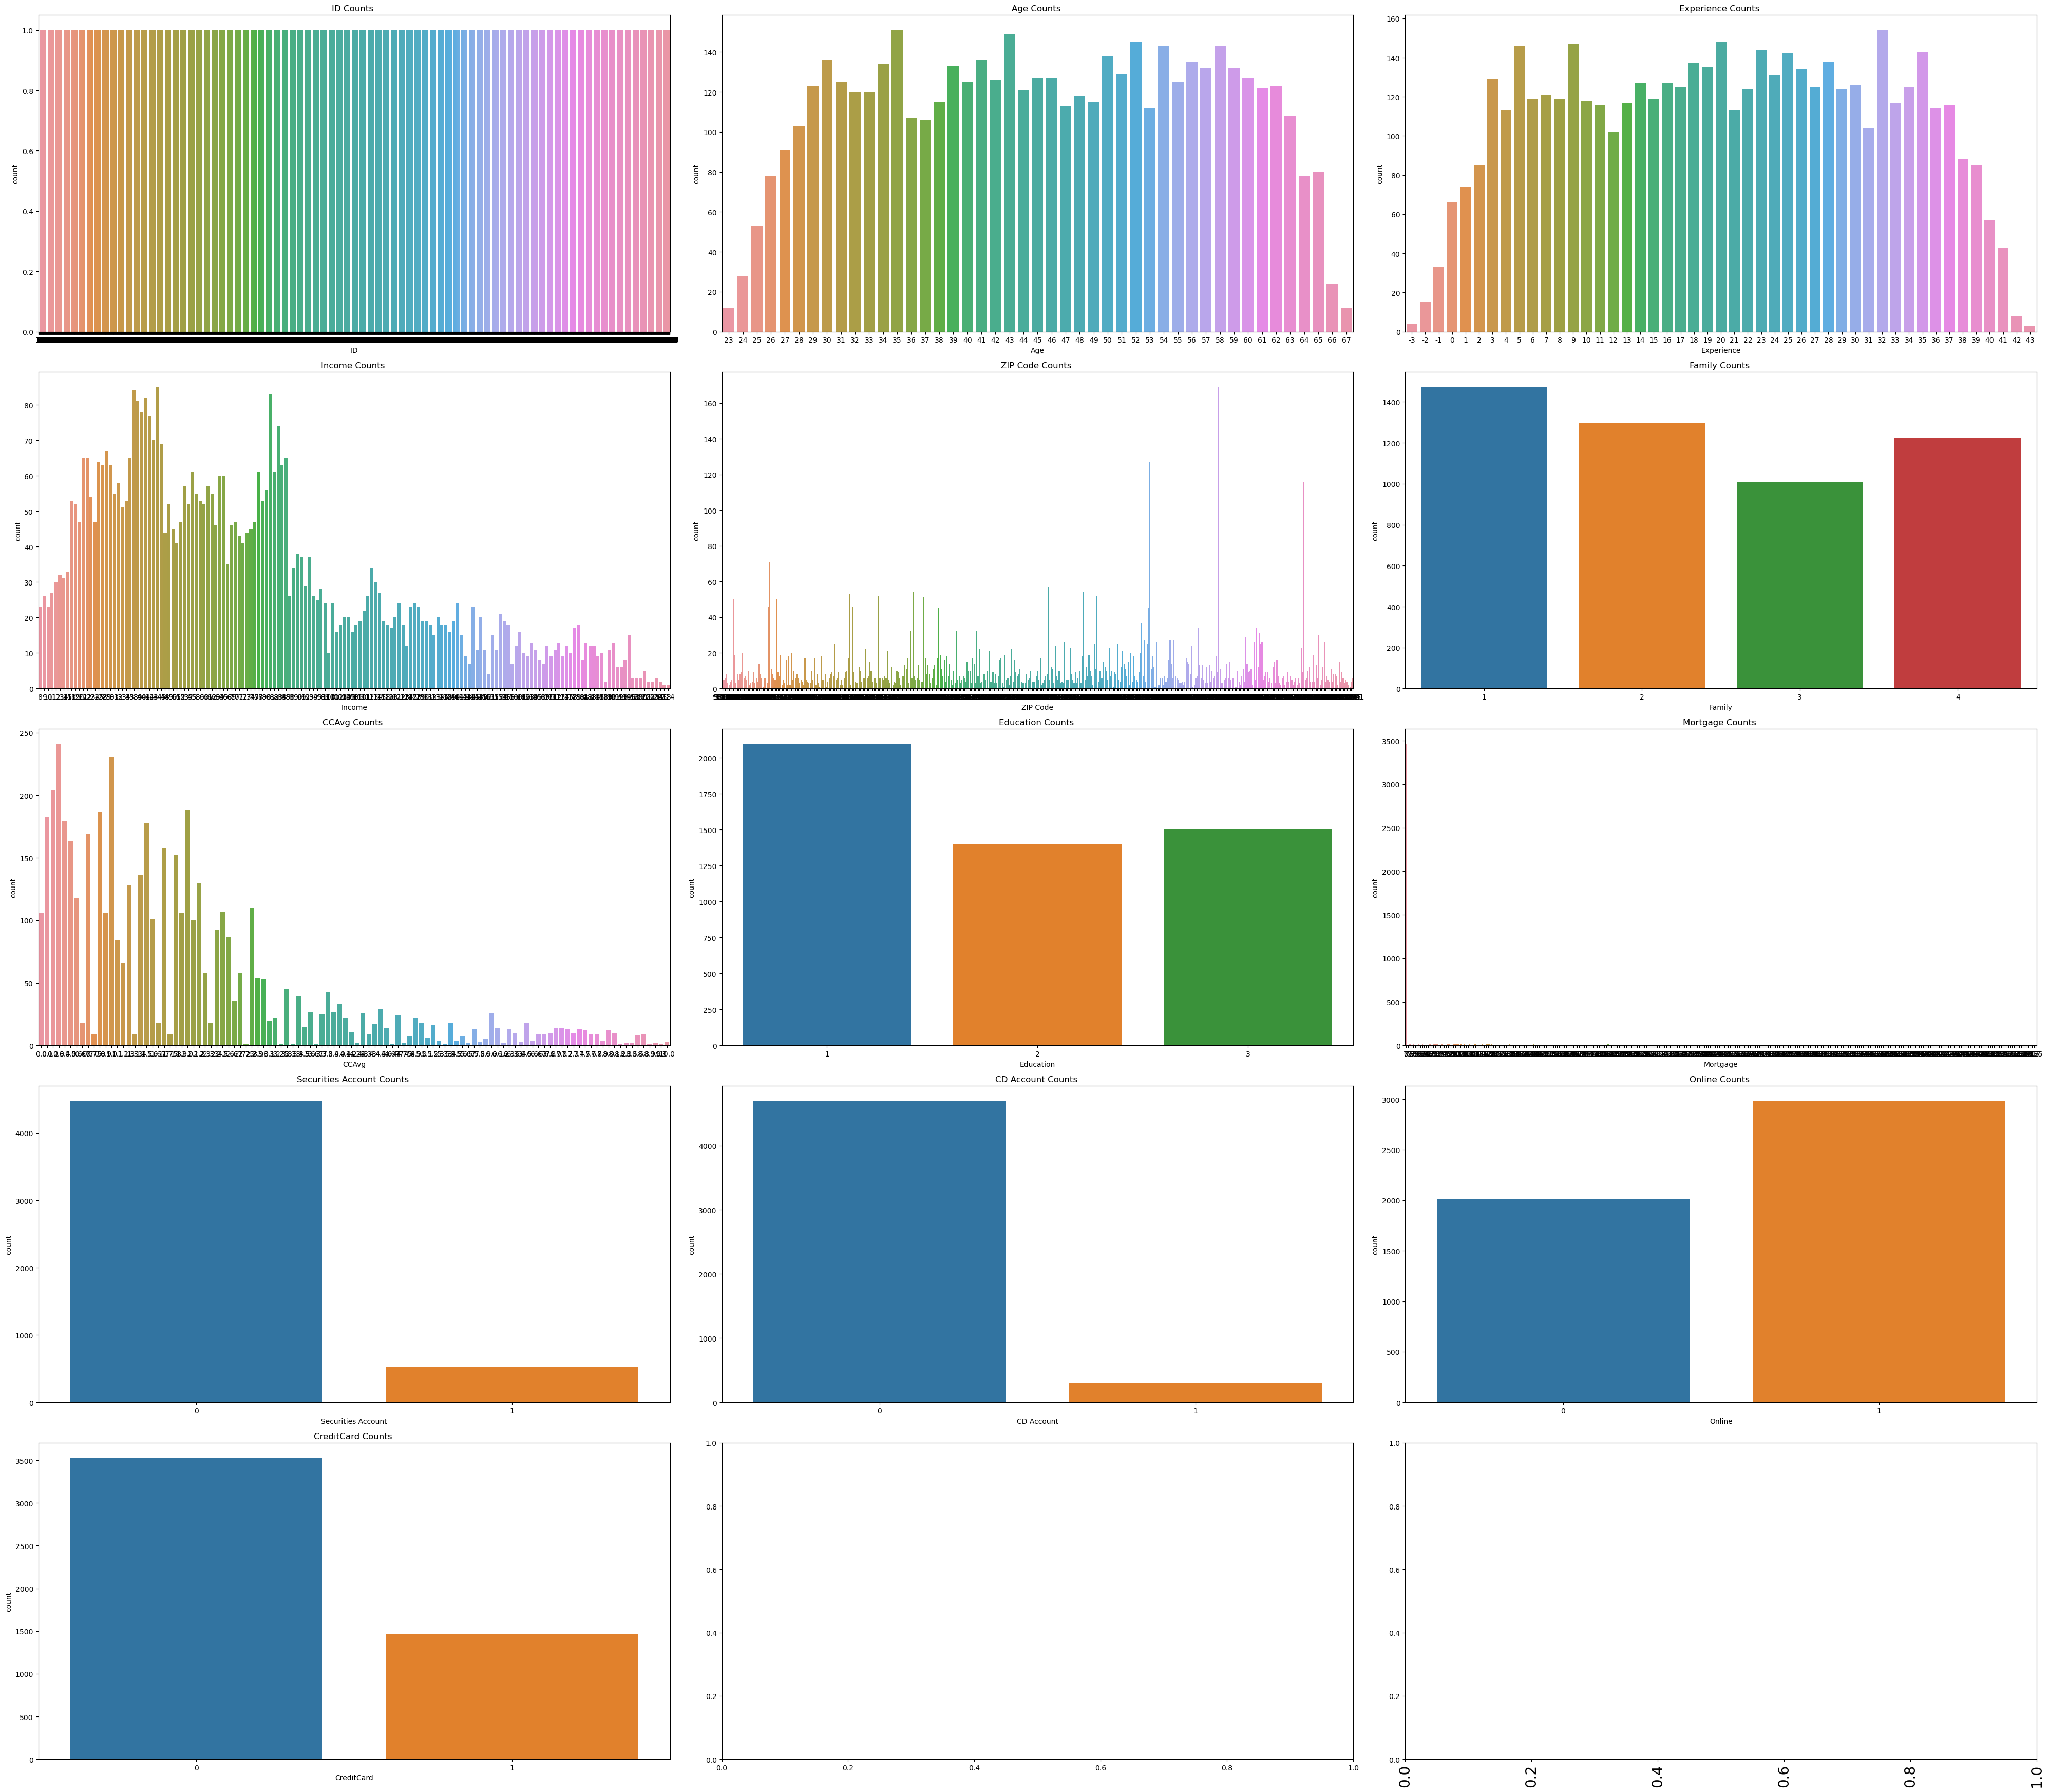

In [8]:
fig , ax = plt.subplots(nrows= 5 , ncols= 3,figsize =(40,35))
ax = ax.flatten()

for i,col in enumerate (features.columns):
    sns.countplot(x =col , ax = ax[i] , data = features )
    ax[i].set_title(f'{col} Counts ')
    plt.xticks(rotation =90 , fontsize =20)
    

plt.tight_layout()
plt.show()

* I did not observe significant noise in above plots .

# Cheking Null value

In [9]:
features.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Cheking Unique value 

In [10]:
features.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

* Those information above indicate diversity of data in each columns 
* Number of the ID are same as Number of Data 

# Correlation 

In [11]:
df = pd.DataFrame(data )
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


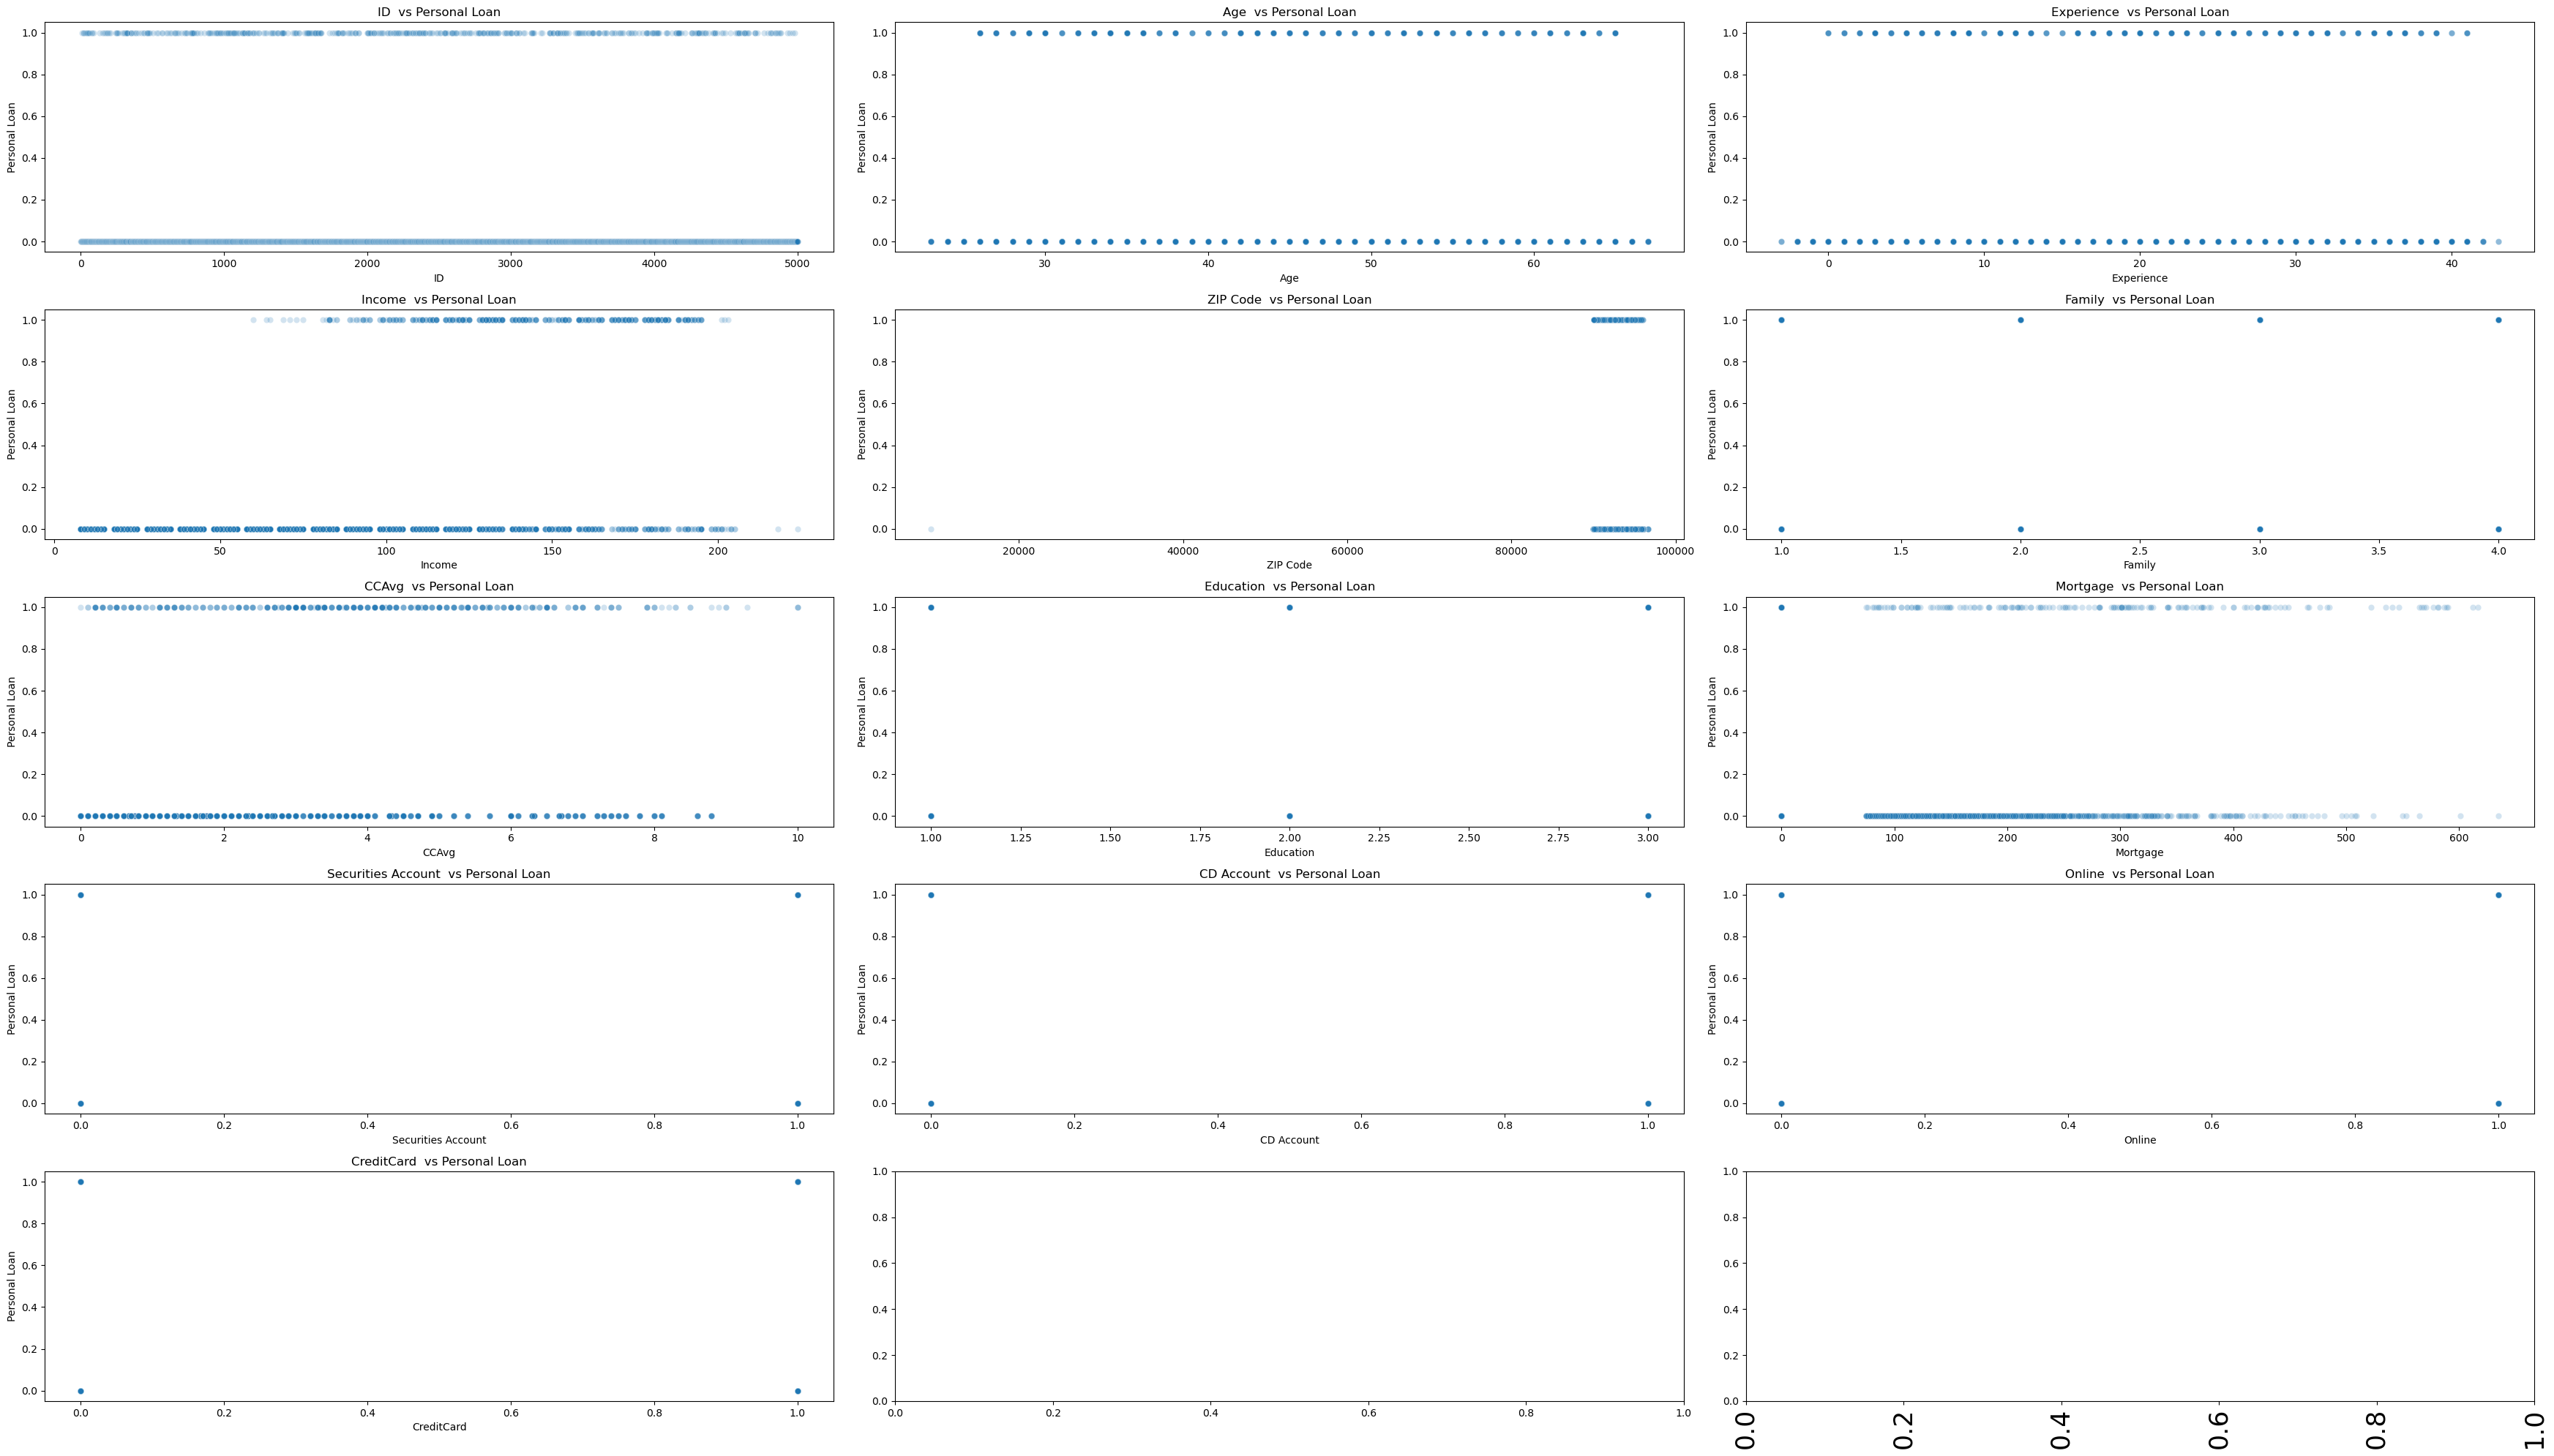

In [12]:
fig , ax = plt.subplots(nrows = 5 , ncols= 3 , figsize = (35,20))

ax = ax.flatten()

for i, col in enumerate (features.columns):
    sns.scatterplot(x = col , y = 'Personal Loan' , ax=ax[i] , data = df , alpha =0.2)
    ax[i].set_title(f'{col}  vs Personal Loan')
    plt.xticks(rotation =90 , fontsize = 25)
    
plt.tight_layout()    
plt.show()    
    
    

* People with High income got more chance for Personal loan 
* Most of people with low Motgage rate did not get Personal loan 


In [13]:
correlaion_map = df.corr()

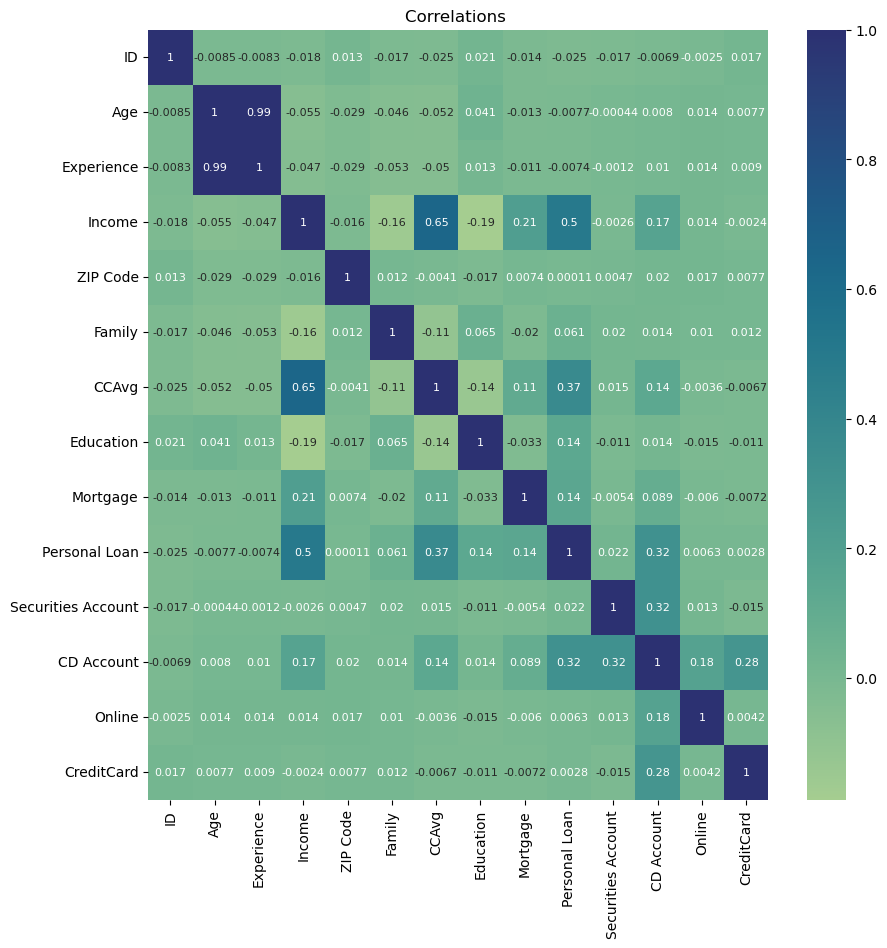

In [14]:
plt.figure(figsize =(10,10))
annot_kws = {'size':8}
sns.heatmap(correlaion_map , annot =True , cmap ='crest' ,annot_kws= annot_kws)
plt.title('Correlations ')
plt.show()

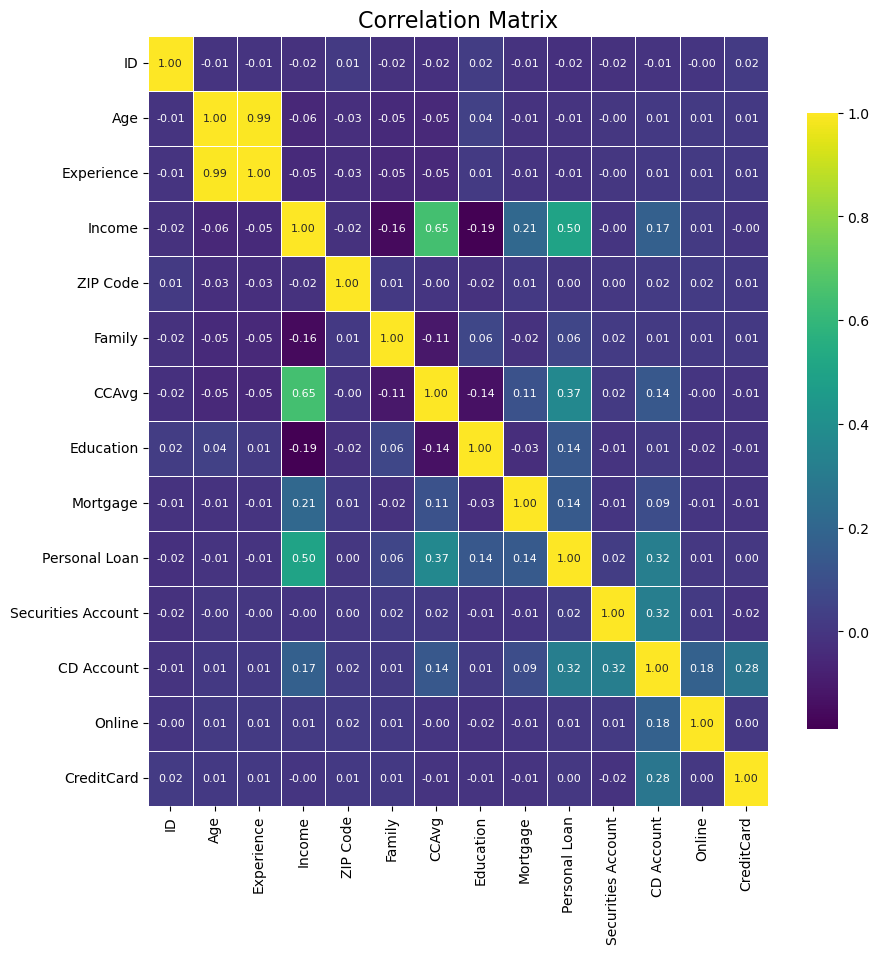

In [15]:


# Assuming 'correlation_map' is your correlation matrix
plt.figure(figsize=(10, 10))

# Customize the color palette, adjust linewidths between squares, and use rounded rectangles for annotations
sns.heatmap(correlaion_map, annot=True, cmap='viridis', linewidths=0.5, annot_kws={'size': 8}, fmt=".2f", cbar_kws={"shrink": 0.8})

# Set the title and adjust font size
plt.title('Correlation Matrix', fontsize=16)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()


* ID doesn't have significant correlation with other features and target
* Age and Experience has high correlation amount --> 0.99 
* Income and CCAvg have high corr ---> 0.65 
* Income and Personal loan also have correlation -->0.5
* ZIP code likewise ID doesn't have significant correlation with others 
* Family also doesn't have significant correlation with other feature and target 
* CCavg and Personal loadn correlation is also considerable 
* Education also doesn't have significant corr with personal loan but more thatn ID and Zip code 
* Mortgage and Income have corr --> 0.21
* Mortgage and personal loan also Doesn't have significant correlation -->0.14
* Personal loan most correlation ( if we consider corr >0.1) : Income , CCAvg , Education , Mortgage , CD Account 
* Securites Account and CD Account have good correlation 0.32
*  CD Acount and Income , CCAvg , Personal Loan , Securites Acount , Online , Credit card 
* Online and CD Account 
* Credit Card CD Account 

* for binary feature selection considering 0 ,1 doesn't help model because multipication of 0*0 = 0  and 1*1 = 1 , it will not show importance of feature selection 

In [16]:
# CD Accpount , Credit Card , Seccurity Account , online --> 1-->3 , 0---> 2 

In [17]:
df_logreg = pd.DataFrame(data)

In [18]:
df_logreg['CD Account'].replace(to_replace=[0,1] ,value=[2,3] , inplace = True)
df_logreg['CreditCard'].replace(to_replace=[0,1] ,value=[2,3] , inplace = True)
df_logreg['Securities Account'].replace(to_replace=[0,1] ,value=[2,3] , inplace = True)
df_logreg['Online'].replace(to_replace=[0,1] ,value=[2,3] , inplace = True)

In [19]:
df_logreg.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,2.104400,2.06040,2.596800,2.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.00000,2.000000,2.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,2.000000,2.00000,2.000000,2.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,2.000000,2.00000,3.000000,2.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,2.000000,2.00000,3.000000,3.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,3.000000,3.00000,3.000000,3.000000


* I saw noise in data about experience ( experience can not be less than 0 year but in describe has been mentioned that min is -3)

In [20]:
df_logreg = df_logreg[df_logreg['Experience']>= 0]


# Feature selection :

# logistic regression :

Zip code and ID  and Family according to low correlation can not be feature but it should be in model in case that client eneter data about them 

Feature based on heatmap and correalation :
Income , CCAvg , Education , Mortgage , CD Account , (Income * CC Avg ) ,( CD Account * CreditCard) , ( CD Account * CCAvg ) , ( CD Acount * Security Account ) , ( CD Account * Online )  


In [21]:
df_logreg['Income*CCAvg'] = df_logreg['Income'] * df['CCAvg']
df_logreg['CD Account * CreditCard '] = df_logreg['CD Account'] * df_logreg['CreditCard']
df_logreg['CD Account * CCAvg'] = df_logreg['CD Account'] * df_logreg['CCAvg']
df_logreg['CD Account * Security Account '] = df_logreg['CD Account'] *df_logreg['Securities Account']
df_logreg['CD Account * Online'] = df_logreg['CD Account'] * df_logreg['Online']

In [22]:
df_logreg

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income*CCAvg,CD Account * CreditCard,CD Account * CCAvg,CD Account * Security Account,CD Account * Online
0,1,25,1,49,91107,4,1.6,1,0,0,3,2,2,2,78.4,4,3.2,6,4
1,2,45,19,34,90089,3,1.5,1,0,0,3,2,2,2,51.0,4,3.0,6,4
2,3,39,15,11,94720,1,1.0,1,0,0,2,2,2,2,11.0,4,2.0,4,4
3,4,35,9,100,94112,1,2.7,2,0,0,2,2,2,2,270.0,4,5.4,4,4
4,5,35,8,45,91330,4,1.0,2,0,0,2,2,2,3,45.0,6,2.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,2,2,3,2,76.0,4,3.8,4,6
4996,4997,30,4,15,92037,4,0.4,1,85,0,2,2,3,2,6.0,4,0.8,4,6
4997,4998,63,39,24,93023,2,0.3,3,0,0,2,2,2,2,7.2,4,0.6,4,4
4998,4999,65,40,49,90034,3,0.5,2,0,0,2,2,3,2,24.5,4,1.0,4,6


# Normalizng 

In [23]:
column = df_logreg.columns.tolist()

In [24]:
# remove target from column list 
column.remove('Personal Loan')

In [25]:
column

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Income*CCAvg',
 'CD Account * CreditCard ',
 'CD Account * CCAvg',
 'CD Account * Security Account ',
 'CD Account * Online']

In [26]:
x = pd.DataFrame(df_logreg , columns = column)
y = df_logreg['Personal Loan'].values.reshape(-1,1)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_logreg.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income*CCAvg,CD Account * CreditCard,CD Account * CCAvg,CD Account * Security Account,CD Account * Online
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,2.104285,2.061035,2.597009,2.294058,194.964762,4.758690,4.047569,4.360348,5.373282
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664,288.622270,1.292159,3.846683,1.018179,1.311080
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,4.000000,4.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,25.150000,4.000000,1.400000,4.000000,4.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,88.000000,4.000000,3.000000,4.000000,6.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,2.000000,2.000000,3.000000,3.000000,210.600000,6.000000,5.200000,4.000000,6.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2030.000000,9.000000,25.800000,9.000000,9.000000


Since there are no negative value , I choosed range (0,1) for normalizing 

In [29]:
norm = MinMaxScaler(feature_range=(0,1))
x = norm.fit_transform(x)

In [30]:
x_train , x_test, y_train , y_test = train_test_split(x,y.ravel(),test_size=0.2 , random_state= 0)

In [31]:
logreg = LogisticRegression(solver='liblinear')

In [32]:
logreg.fit(x_train , y_train)

LogisticRegression(solver='liblinear')

In [33]:
y_pred = logreg.predict(x_test)

# Accuracy of the model :

In [34]:
metrics.accuracy_score(y_test , y_pred)

0.9505050505050505

In [35]:
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay

In [36]:
print(classification_report( y,logreg.predict(x) ))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4468
           1       0.88      0.59      0.70       480

    accuracy                           0.95      4948
   macro avg       0.92      0.79      0.84      4948
weighted avg       0.95      0.95      0.95      4948



In [37]:
cm = confusion_matrix(y,logreg.predict(x))

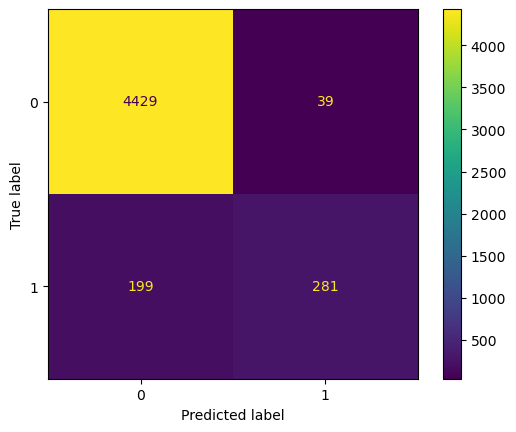

In [38]:
plot =ConfusionMatrixDisplay(cm )
plot.plot()
plt.show()

In [39]:
# in form of confusion matrix (y real , y_pred ) form will be like above

In [40]:
K_fold = KFold(10)
result = cross_val_score(logreg , x , y.ravel(), cv= K_fold )

In [41]:
result

array([0.95353535, 0.95353535, 0.94747475, 0.94747475, 0.95555556,
       0.95151515, 0.95353535, 0.93737374, 0.95951417, 0.94534413])

In [42]:
# Since all part of data , well train and test well , I don't see neccessary to use Cross validation 

#  Naive Bayes 

In [43]:
clf = GaussianNB()


In [44]:
# x after normailizng and added feature selection 
x_train  , x_test , y_train , y_test = train_test_split(x,y.ravel() ,test_size=0.2 , random_state= 0)

In [45]:
clf.fit(x_train , y_train)

GaussianNB()

In [46]:
y_pred = clf.predict(x_test)

In [47]:
print(f'Accuracy of model  is {metrics.accuracy_score(y_test , y_pred)}')

Accuracy of model  is 0.8717171717171717


In [48]:
print(classification_report(y ,clf.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4468
           1       0.41      0.60      0.49       480

    accuracy                           0.88      4948
   macro avg       0.68      0.75      0.71      4948
weighted avg       0.90      0.88      0.89      4948



In [49]:
cm_nb = confusion_matrix(y ,clf.predict(x))

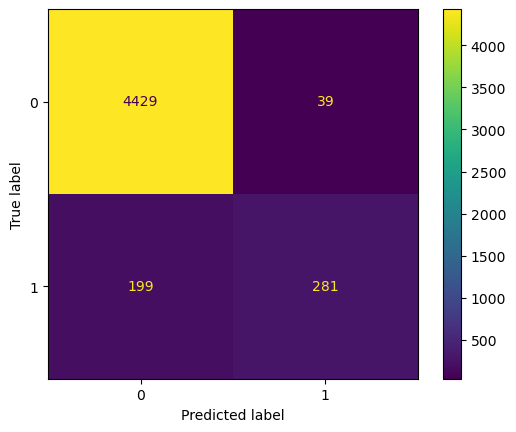

In [50]:
display = ConfusionMatrixDisplay(cm )
display.plot()
plt.show()

# KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k = 3
clf_knn = KNeighborsClassifier(k)

In [53]:
x_train , x_test , y_train , y_test = train_test_split(x , y.ravel() , test_size= 0.2 , random_state= 0)
clf_knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = clf_knn.predict(x_test)
print(f'Accuracy of the KNN Model with k = {k} : {metrics.accuracy_score(y_pred , y_test)}')

Accuracy of the KNN Model with k = 3 : 0.9626262626262626


In [55]:
# I got the same accuracy level with logistic regression 

# improve the model 

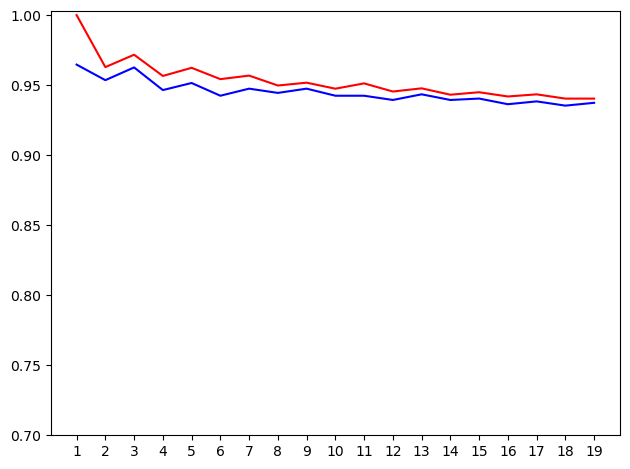

In [56]:
train_accuracy = []
test_accuracy = []

Kneighbors_range = range(1,20)

for i in Kneighbors_range:
    clf_a = KNeighborsClassifier(i)
    clf_a.fit(x_train , y_train)
    train_accuracy.append(metrics.accuracy_score(clf_a.predict(x_train), y_train))
    test_accuracy .append(metrics.accuracy_score(y_test , clf_a.predict(x_test)))
    
plt.plot(Kneighbors_range , train_accuracy , label = 'train' , color = 'red')
plt.plot(Kneighbors_range , test_accuracy , label = 'test' , color = 'blue')
plt.xticks(Kneighbors_range)
plt.yticks(np.arange(0.7 ,1 ,0.05))
plt.tight_layout()
plt.show()

* k = 9 accuray of train and test model are so close to each other 

In [57]:
parameter = {'n_neighbors': range(1,50)}
grid_knn = GridSearchCV(estimator=clf_knn , param_grid= parameter , scoring='accuracy' ,cv =5 , verbose=1 , n_jobs=-1)

In [58]:
grid_knn.fit(x_train , y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [59]:
grid_knn.best_params_

{'n_neighbors': 3}

In [60]:
# with K=3 , best answer between Knn ,naive bayes and Logistic regression 

# Predicting

In [ ]:


Id = float(input('Input your id  : '))
Age = int(input('Input your age : '))
Experience = float(input('Input your experience '))
Income = float(input('Input your income : '))
ZIP_code = int(input('Input your ZIP'))
Family = int(input('Input count of your family'))
CCAvg = float(input('Input your CCAvg'))
Education = int(input('Input your Education level : undergrad = 2 , grad = 3 , pro = 4 '))
Mortgage = int(input('Input your Mortgage '))
Securities_Account = int(input('Do you have security account ? No =2 , Yes = 3 '))
Cd_Account = int(input('Do you have Cd Account  No =2 , Yes =3'))
Online = int(input('Are you online base  No =2 , Yes =3'))
Credit_card = int(input('Do you have Credit card   No =2 , Yes =3'))

# Create a list of dictionaries
data = [{'ID': Id, 'Age': Age, 'Experience': Experience, 'Income': Income, 'ZIP Code': ZIP_code,
         'Family': Family,'CCAvg':CCAvg, 'Education': Education, 'Mortgage': Mortgage, 'Securities Account': Securities_Account,
         'CD Account': Cd_Account, 'Online': Online, 'CreditCard': Credit_card,
         'Income*CCAvg': Income * CCAvg, 'CD Account * CreditCard': Cd_Account * Credit_card,
         'CD Account * CCAvg': Cd_Account * CCAvg, 'CD Account * Security Account': Cd_Account * Securities_Account,
         'CD Account * Online': Cd_Account * Online}]

# Create the DataFrame
df_quest = pd.DataFrame(data)

# Display the DataFrame
print(df_quest)


In [ ]:
logreg.fit(x,y.ravel() )

In [ ]:
clf_knn.fit(x,y.ravel())

In [ ]:
clf.fit(x,y.ravel())

In [ ]:
print(f'Personal loan with logistic regression ----> {logreg.predict(df_quest.values)}')
print(f'Personal loan with Kneighbors Classifier ----> {clf_knn.predict(df_quest.values)}')
print(f'Personal loan with Naive Bayes  ----> {clf.predict(df_quest.values)}')



# So in My All model Personal Loan will not go to this person 